<a href="https://colab.research.google.com/github/vsneelesh/BERT-Based-Sentiment-Analysis-with-Keyword-Extraction/blob/main/Classification_of_images_using_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [ ]:
# Loading the dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Preprocessing the data
 # normalize to range 0-1
train_images = train_images / 255.0
test_images = test_images / 255.0

#train_labels = train_labels
#test_labels = test_labels

# Hot encoding
train_labels_h = to_categorical(train_labels)
test_labels_h = to_categorical(test_labels)

print(train_images.shape)
print(train_labels_h.shape)
print(test_images.shape)
print(test_labels_h.shape)

(60000, 28, 28)
(60000, 10)
(10000, 28, 28)
(10000, 10)


5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


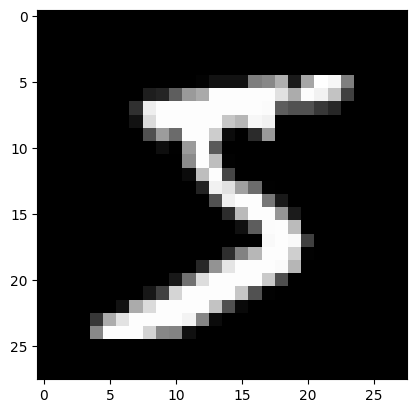

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap = 'gray')

print(train_labels[0])
print(train_labels_h[0])

In [ ]:
train_lab = to_categorical(train_labels_h[0])
print(train_lab)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [ ]:
# Building the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compiling the model with Adam optimizer
import tensorflow as tf

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(train_images, train_labels_h, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2540 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1095 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0756 - accuracy: 0.9773
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0562 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0433 - accuracy: 0.9868


In [ ]:
model.fit(x=train_images,y=train_labels,validation_data=(test_images,test_labels),epochs=5, batch_size=32)

Epoch 1/5


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2221, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5573, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (32, 1) and (32, 10) are incompatible


In [ ]:
# Evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels_h) #batch size = 32
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0774 - accuracy: 0.9775
Test accuracy: 0.9775000214576721


In [ ]:
test_predicted = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [ ]:
print(test_labels[1])
print(test_predicted[1])

2
[1.33800073e-08 4.02776321e-04 9.99589026e-01 4.37229573e-06
 4.41148523e-16 3.59917044e-06 6.62296884e-08 1.71622872e-12
 1.13204806e-07 1.74230950e-14]


In [ ]:
from sklearn.metrics import classification_report
label_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9']
print(classification_report(test_labels_h, test_predicted.round(),target_names=label_names))

              precision    recall  f1-score   support

     Class 0       0.99      0.99      0.99       980
     Class 1       0.99      0.99      0.99      1135
     Class 2       0.98      0.97      0.97      1032
     Class 3       0.97      0.98      0.97      1010
     Class 4       0.99      0.96      0.97       982
     Class 5       0.99      0.97      0.98       892
     Class 6       0.98      0.98      0.98       958
     Class 7       0.99      0.96      0.97      1028
     Class 8       0.99      0.96      0.97       974
     Class 9       0.96      0.98      0.97      1009

   micro avg       0.98      0.97      0.98     10000
   macro avg       0.98      0.97      0.98     10000
weighted avg       0.98      0.97      0.98     10000
 samples avg       0.97      0.97      0.97     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

The F-measure can be interpreted as a weighted harmonic mean of the precision and recall: reaches its best value at 1 and its worst score at 0.

In [ ]:
# Compiling the model with Stochastic Gradient Descent optimizer
import tensorflow as tf

SGD = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Training the model
model.fit(train_images, train_labels_h, validation_data=(test_images, test_labels_h), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0273 - accuracy: 0.9925 - val_loss: 0.0722 - val_accuracy: 0.9788
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0252 - accuracy: 0.9935 - val_loss: 0.0708 - val_accuracy: 0.9791
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0243 - accuracy: 0.9938 - val_loss: 0.0700 - val_accuracy: 0.9796
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0237 - accuracy: 0.9941 - val_loss: 0.0694 - val_accuracy: 0.9797
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0232 - accuracy: 0.9943 - val_loss: 0.0690 - val_accuracy: 0.9796


In [ ]:
# Evaluating the model

test_loss, test_acc = model.evaluate(test_images, test_labels_h) #batch size = 32
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0690 - accuracy: 0.9796
Test accuracy: 0.9796000123023987


In [ ]:
test_labels[1]

2

In [ ]:
from sklearn.metrics import confusion_matrix

test_predicted = model.predict(test_images)
test_predicted_classes = np.argmax(test_predicted,axis = 1)

import numpy as np

cm = confusion_matrix(y_true = test_labels, y_pred = test_predicted_classes)
print(cm)

313/313 [==============================] - 0s 1ms/step
[[ 961    0    4    2    0    3    6    1    3    0]
 [   0 1107    2    2    0    2    4    1   17    0]
 [  11    5  915   17   15    2   15   11   37    4]
 [   2    1   21  907    0   31    2   19   19    8]
 [   2    3    5    1  911    2   13    2    5   38]
 [  13    3    6   41    9  762   15   10   26    7]
 [  14    3    5    1   10   15  904    2    4    0]
 [   4   10   23    5    8    0    0  934    3   41]
 [   9    6    9   25   12   33   13    7  844   16]
 [  15    8    2   12   37    6    0   25    4  900]]


In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision: ', precision_score(test_labels, test_predicted_classes, average='macro'))
print('Recall: ', recall_score(test_labels, test_predicted_classes, average='macro'))
print('Accuracy: ', accuracy_score(test_labels, test_predicted_classes))
print('F1 Score: ', f1_score(test_labels, test_predicted_classes, average='macro'))

Precision:  0.9133060135105661
Recall:  0.913324391736813
Accuracy:  0.9145
F1 Score:  0.9131551272486387
